<h3>Exploring Implemetation of Random Forest</h3>

Since Random Forest is an ensemble of many decision trees , many hyper-parameters between these two classes are shared. This notebook explores important hyper-params unique to Random Forest

In [1]:
from sklearn.ensemble import RandomForestClassifier

help(RandomForestClassifier())

Help on RandomForestClassifier in module sklearn.ensemble._forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)
 |
 |  A random forest classifier.
 |
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  Trees in the forest use the best split strategy, i.e. equivalent to passing
 |  `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
 |  The sub-sample size is controlled with the `max_samples` parameter i

<h3> Implementing simple Random Forest with penguins_size.csv data to classify species of given penguin's features </h3>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../Datasets/penguins_size.csv')

In [3]:
data.sample(10)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
282,Gentoo,Biscoe,45.7,13.9,214.0,4400.0,FEMALE
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,FEMALE
251,Gentoo,Biscoe,42.8,14.2,209.0,4700.0,FEMALE
318,Gentoo,Biscoe,48.4,14.4,203.0,4625.0,FEMALE
65,Adelie,Biscoe,41.6,18.0,192.0,3950.0,MALE
272,Gentoo,Biscoe,45.1,14.4,210.0,4400.0,FEMALE
241,Gentoo,Biscoe,45.1,14.5,215.0,5000.0,FEMALE
266,Gentoo,Biscoe,45.5,13.9,210.0,4200.0,FEMALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
24,Adelie,Biscoe,38.8,17.2,180.0,3800.0,MALE


In [ ]:
# Checking for missing values
data.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [12]:
# Data frame has less null values so it is no harm in dropping columns with missing data

data = data.dropna()

In [13]:
data.isna().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [15]:
X = pd.get_dummies(data.drop('species' , axis=1) , drop_first=True)
y = data['species']

In [47]:
from sklearn.model_selection import train_test_split

#X_train , X_test,  y_train , y_test = train_test_split(X , y , test_size=0.3 , random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100 , criterion='gini' , max_features='sqrt' , random_state=42)
model.fit(X_train , y_train)

RandomForestClassifier(random_state=42)

Classification Report : 
               precision    recall  f1-score   support

      Adelie       0.98      1.00      0.99        49
   Chinstrap       1.00      0.94      0.97        18
      Gentoo       1.00      1.00      1.00        34

    accuracy                           0.99       101
   macro avg       0.99      0.98      0.99       101
weighted avg       0.99      0.99      0.99       101



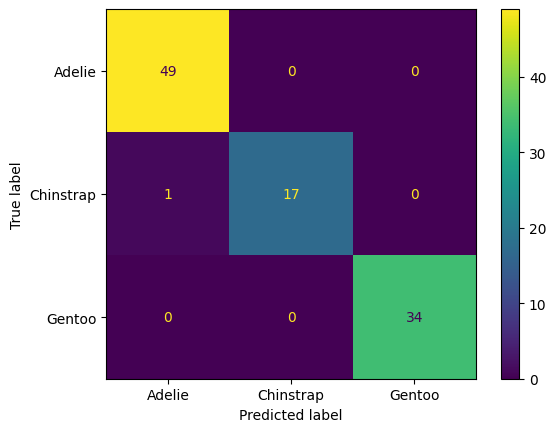

In [ ]:
from sklearn.metrics import classification_report , ConfusionMatrixDisplay , confusion_matrix

pred = model.predict(X_test)

print("Classification Report : \n" , classification_report(y_test , pred))

matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test , pred), display_labels=model.classes_)
matrix.plot()
plt.show()